# Activity 1-2: Solving differential equations

## Background

This problem is based on Exercise 8.2 in Mark Newman's [Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html) textbook. The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) are a simple a model of the population dynamics of predators and prey. They also naturally appear in some physical models and in economics.

Let $x$ be proportional to the population of prey animals (traditionally called *rabbits*), and  let $y$ be proportional to the population of predators (traditionally called *foxes*).

In this model the rabbits reproduce at a constant rate, but they are also eaten by the foxes. The foxes reproduce at a rate proportional to how much they eat, but they also die of old age. 

The Lotka-Volterra equations are  

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta x y\,,\\  
\frac{dy}{dt} &= \gamma x y - \delta y\,.  
\end{aligned} \end{align}
$$
 
The dimensionless parameters $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real numbers that characterize the interaction of the two species.

## 1. Understanding the problem

What do the parameters in the Lotka-Volterra equations mean?

- $\alpha$ is the rabbit reproduction rate. We can see this because the rate of change of the rabbit population $\dot{x}$ has a term $\alpha x$, which makes the population increase at a rate proportional to itself.
- $\beta$ is the rate that rabbits are eaten by wolves. The reduction in the rabbit population due to predation by wolves is proportional to both the number of rabbits $x$ and the number of wolves $y$.
- $\gamma$ is the wolf reproduction rate, which depends on the number of rabbits available as food.
- $\delta$ is the rate that wolves die. The total decrease in the wolf population per unit time depends on the current number of wolves $y$ and the death rate.

## 2. Coding the dynamics

Let's build the code to understand this system. We have two first order differential equations,

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= f(x, y, t)\,,\\  
\frac{dy}{dt} &= g(x, y, t)\,.  
\end{aligned} \end{align}
$$

Let these be functions of global variables, $\alpha=$ `a`, $\beta=$ `b`, $\gamma=$ `c`, and $\delta=$ `d`. We can integrate these in the same way that we would approach a single differential equation. The only tricky thing to consider in this case is that we should update the values of $x$ and $y$ **at the same time**, rather than sequentially.

### 2.a. Defining the parameters and derivative functions

Fill this in to set up the problem:

In [0]:
# We can define all parameters at once

a, b, c, d = .6, 1.3, 1.0, 1.0

def f(x, y, t):
    """
    This is the rate of change of rabbits as a function 
    of the current number of rabbits (x), the current number
    of foxes (y), and the current time (t).
    """
    return a * x - b * x * y

def g(x, y, t):
    """
    This is the rate of change of foxes as a function 
    of the current number of rabbits (x), the current number
    of foxes (y), and the current time (t).
    """
    return c * x * y - d * y

In [2]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1, .1, 0) )
print( g(.1, .1, 0) )

0.047
-0.09


### 2.b. Time evolution 

At $t=0$, use the **initial conditions** $x(0) = y(0) = 2$. We would like to know what happens to the populations from the initial time $t=0$ to a later time $t=5$. In this case, we aren't particularly concerned about the units of $t$.

Use **Euler's method** to find the values of $x$ and $y$ over time. Use a time step of $\Delta t = 0.005$. One way to do this would be to update the `integrate` function that we wrote together so that you can numerically integrate two (coupled) differential equations at the same time.

Then, plot the populations as a function of time using `seaborn` or `matplotlib`. 

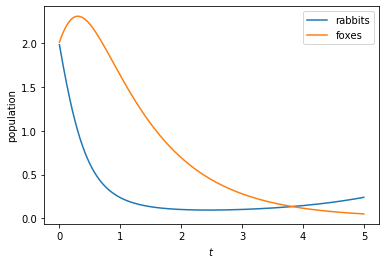

In [9]:
#%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
t0 = 0
te = 5

# Find x, y values over time with Euler's method
# Save the times to an array (or list) called `times`
# Save the x and y values to arrays or lists called `xlist` and `ylist`

times = np.arange(t0, te, dt)

x = x0
y = y0

xlist = []
ylist = []

for i in range(len(times)):
  dx = f(x, y, times[i]) * dt
  dy = g(x, y, times[i]) * dt

  x = x + dx
  y = y + dy

  xlist.append(x)
  ylist.append(y)

# Plot the results

sns.lineplot(times, xlist, label='rabbits')
sns.lineplot(times, ylist, label='foxes')
plt.xlabel(r'$t$')
plt.ylabel('population');

### 2.c. Discussion

Your plot should look something like this:

<img src="https://github.com/johnbarton/Python-workshop/blob/master/rabbits-foxes.png?raw=1" width=500>

In your own words, explain what is happening with the rabbit and fox populations over the time period shown. What do you expect will happen as these populations continue to evolve?

### 2.d. Evolution into the future

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code to go from $t=0$ to $t=25$.

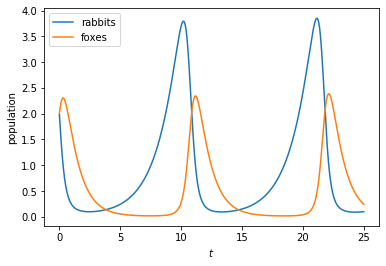

In [10]:
#%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
t0 = 0
te = 25

# Find x, y values over time with Euler's method
# Save the times to an array (or list) called `times`
# Save the x and y values to arrays or lists called `xlist` and `ylist`

times = np.arange(t0, te, dt)

x = x0
y = y0

xlist = []
ylist = []

for i in range(len(times)):
  dx = f(x, y, times[i]) * dt
  dy = g(x, y, times[i]) * dt

  x = x + dx
  y = y + dy

  xlist.append(x)
  ylist.append(y)

# Plot the results

sns.lineplot(times, xlist, label='rabbits')
sns.lineplot(times, ylist, label='foxes')
plt.xlabel(r'$t$')
plt.ylabel('population');

### 2.e. Other initial conditions

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code with a different set of Lotka-Volterra parameters:

```python
a, b, c, d = 4, 2, 3, 3
```

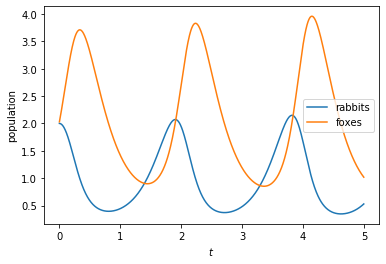

In [11]:
#%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = 4, 2, 3, 3

x0 = 2
y0 = 2
dt = 0.005
t0 = 0
te = 5

# Find x, y values over time with Euler's method
# Save the times to an array (or list) called `times`
# Save the x and y values to arrays or lists called `xlist` and `ylist`

times = np.arange(t0, te, dt)

x = x0
y = y0

xlist = []
ylist = []

for i in range(len(times)):
  dx = f(x, y, times[i]) * dt
  dy = g(x, y, times[i]) * dt

  x = x + dx
  y = y + dy

  xlist.append(x)
  ylist.append(y)

# Plot the results

sns.lineplot(times, xlist, label='rabbits')
sns.lineplot(times, ylist, label='foxes')
plt.xlabel(r'$t$')
plt.ylabel('population');

### 2.f. Instability

Let's see what happens if the integration parameters are chosen poorly. 

Once again, copy your code from part 2.b and paste it into the empty cell below. You should be back to the original set of  Lotka-Volterra parameters:

```python
a, b, c, d = .6, 1.3, 1, 1
```

But this time, let's try to be cheap and use a much bigger time step. Try using `dt = 0.5` and integrating from $t=0$ to $t=5$. This should look nothing like the behavior you expect from the plots you produced earlier. Can you explain what went wrong?

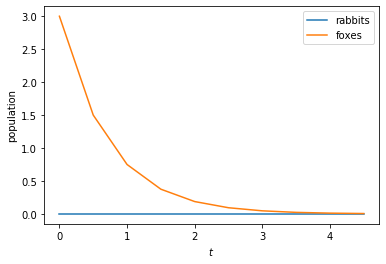

In [14]:
# A reminder of our earlier parameters
a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.5
t0 = 0
te = 5

# Find x, y values over time with Euler's method
# Save the times to an array (or list) called `times`
# Save the x and y values to arrays or lists called `xlist` and `ylist`

times = np.arange(t0, te, dt)

x = x0
y = y0

xlist = []
ylist = []

for i in range(len(times)):
  dx = f(x, y, times[i]) * dt
  dy = g(x, y, times[i]) * dt

  x = x + dx
  y = y + dy

  xlist.append(x)
  ylist.append(y)

# Plot the results

sns.lineplot(times, xlist, label='rabbits')
sns.lineplot(times, ylist, label='foxes')
plt.xlabel(r'$t$')
plt.ylabel('population');

## 3. Population Dynamics Phase Space

By now you've noticed the periodic behavior of the system. We can visualize how the predator and prey populations are related with a phase space plot. 

### 3.a. Plotting in the predator-prey plane

Copy the code from part 2.d above, where we integrated from $t=0$ to $t=25$, and modify it so that it plots the rabbit and fox populations on the horizontal and vertical axes, respectively. Note that, if you're using `seaborn` to make the line plot, you'll want to pass in an additional argument so that it appears correctly, like this:

```python
sns.lineplot(xlist, ylist, sort=False)
```

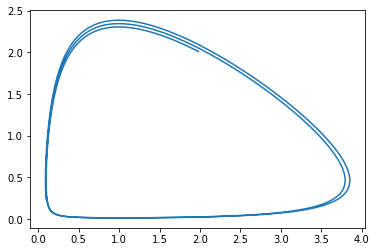

In [15]:
#%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
t0 = 0
te = 25

# Find x, y values over time with Euler's method
# Save the times to an array (or list) called `times`
# Save the x and y values to arrays or lists called `xlist` and `ylist`

times = np.arange(t0, te, dt)

x = x0
y = y0

xlist = []
ylist = []

for i in range(len(times)):
  dx = f(x, y, times[i]) * dt
  dy = g(x, y, times[i]) * dt

  x = x + dx
  y = y + dy

  xlist.append(x)
  ylist.append(y)

# Fill this in to make the plot!

sns.lineplot(xlist, ylist, sort=False)

### 3.b. The velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. Here's an example of how they work:

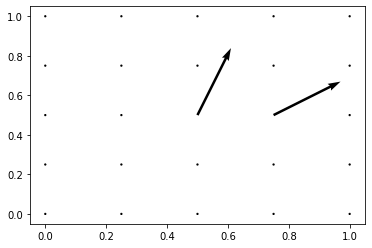

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# base positions of the vectors
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

# magnitude of the x- and y-components of each vector
u = np.zeros((5,5)) # initialize to zero everywhere
v = np.zeros((5,5)) # initialize to zero everywhere

u[2,2] = .1 # x-component of vector at (2,2)
v[2,2] = .2 # y-component of vector at (2,2)

u[2,3] = .2 # x-component of vector at (2,2)
v[2,3] = .1 # y-component of vector at (2,2)

plt.quiver(x, y, u, v, scale=1)
plt.show()

Make a vector field that shows the vector 

$$ \mathbf{v}(x,y) = \left (\dot x, \dot y \right)$$

at each position on the predator-prey plane. Some starter code for this is included below.

Overlay the vector field plot on the plot from Problem 3.a.

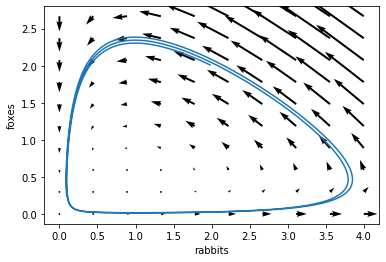

In [17]:
side = np.linspace(0, 4, 10)
XX,YY = np.meshgrid(side, side/1.5)
UU = f(XX,YY,0)
VV = g(XX,YY,0)

plt.quiver(
    XX, YY, UU, VV
)
plt.plot(
    xlist, ylist
)
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.show()

This image now shows the cyclic nature of the predator and prey populations as well as how long the populations spend in different parts of the cycle.

### 3.c. Describe the dynamics

In the Markdown cell below, write a few sentences describing the cycle of rabbit and fox populations. It may be useful to think about this in terms of three "phases" corresponding to the three notable features of the plot in Problem 3.b.